# Classify customer reviews (Supervised learning)

/var/folders/zf/m3g54d9d25q0jn4s7wbccll00000gn/T/ipykernel_29553/1183548122.py:13: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file, usecols=["name", "categories", "reviews.rating", "reviews.text", "reviews.title"])


,name,categories,rating,text,title
0,AmazonBasics AAA Performance Alkaline Batterie...,"AA,AAA,Health,Electronics,Health & Household,C...",3.0,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...
1,AmazonBasics AAA Performance Alkaline Batterie...,"AA,AAA,Health,Electronics,Health & Household,C...",4.0,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...
2,AmazonBasics AAA Performance Alkaline Batterie...,"AA,AAA,Health,Electronics,Health & Household,C...",5.0,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...
3,AmazonBasics AAA Performance Alkaline Batterie...,"AA,AAA,Health,Electronics,Health & Household,C...",5.0,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...
4,AmazonBasics AAA Performance Alkaline Batterie...,"AA,AAA,Health,Electronics,Health & Household,C...",5.0,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...


name          6028
categories       0
rating          33
text             1
title           17
dtype: int64
[3. 4. 5. 1. 2.]


,name,categories,rating,text,title,title_text,combined_text,categories_encoded
0,AmazonBasics AAA Performance Alkaline Batterie...,"AA,AAA,Health,Electronics,Health & Household,C...",3.0,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,... 3 of them and one of the item is bad quali...,... 3 of them and one of the item is bad quali...,1
1,AmazonBasics AAA Performance Alkaline Batterie...,"AA,AAA,Health,Electronics,Health & Household,C...",4.0,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,... always the less expensive way to go for pr...,... always the less expensive way to go for pr...,1
2,AmazonBasics AAA Performance Alkaline Batterie...,"AA,AAA,Health,Electronics,Health & Household,C...",5.0,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,... are not Duracell but for the price i am ha...,... are not Duracell but for the price i am ha...,1
3,AmazonBasics AAA Performance Alkaline Batterie...,"AA,AAA,Health,Electronics,Health & Household,C...",5.0,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,... as well as name brand batteries at a much ...,... as well as name brand batteries at a much ...,1
4,AmazonBasics AAA Performance Alkaline Batterie...,"AA,AAA,Health,Electronics,Health & Household,C...",5.0,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,... batteries are very long lasting the price ...,... batteries are very long lasting the price ...,1


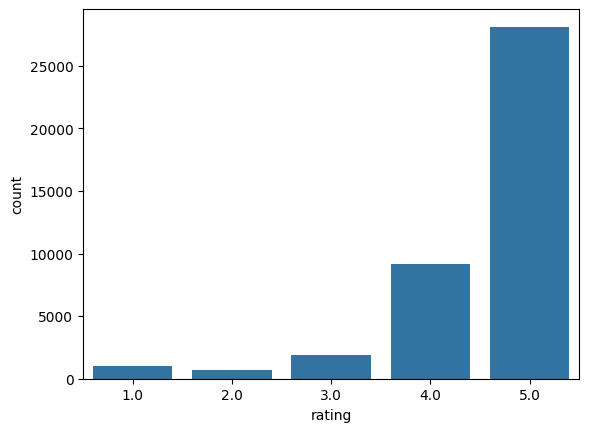

In [2]:
# import and run all cells of the preprocessing file

import nbformat

from IPython.core.interactiveshell import InteractiveShell

with open('preprocessing.ipynb') as f:
    nb = nbformat.read(f, as_version=4)

shell = InteractiveShell.instance()
for cell in nb.cells:
    if cell.cell_type == 'code':
        shell.run_cell(cell.source)

### Naive Bayes

In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_train = nb_model.predict(X_train)
y_pred = nb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8852699889800416

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.76      0.47       192
           1       0.28      0.52      0.37       378
           2       0.98      0.91      0.94      7597

    accuracy                           0.89      8167
   macro avg       0.53      0.73      0.59      8167
weighted avg       0.93      0.89      0.90      8167


Confusion Matrix:
 [[ 145   35   12]
 [  30  195  153]
 [ 248  459 6890]]


### XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(eval_metric='mlogloss')

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
}

# Find the best hyper params
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=0,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

In [ ]:
print("Best params", grid_search.best_params_)
best_model = grid_search.best_estimator_

In [ ]:
y_pred = best_model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

## Save model

In [ ]:
import pickle

with open("../models/xgb_model.pkl", "wb") as f:
    pickle.dump(best_model, f)